In [ ]:
#Definimos las biblotecas que utilzaremos

import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

import seaborn as sns


In [ ]:
# Tomar la dirección URL del archivo en formato 'raw'
url = 'https://raw.githubusercontent.com/Galm12/FisicaComputacional1/main/Actividad%20I/Datos.txt'

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

#Cambiar los valores "Nulo" por un campo vacio
df_dist = df_dist.replace(to_replace='Nulo', value='', regex=True)

#Convertir los valores de las distintas variables a números flotantes flotantes 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_dist[cols] = pd.to_numeric(df_dist[cols], errors='coerce')

#Cambio de formato para la columna Fecha a un formato de fecha que comprende Python
df_dist['Fecha']=pd.to_datetime(df_dist['Fecha'], dayfirst=True)

# Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_dist['Año'] = df_dist['Fecha'].dt.year
df_dist['Mes'] = df_dist['Fecha'].dt.strftime('%b')
df_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11140 entries, 0 to 11139
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   11140 non-null  datetime64[ns]
 1   Precip  11138 non-null  float64       
 2   Evap    6550 non-null   float64       
 3   Tmax    11128 non-null  float64       
 4   Tmin    11128 non-null  float64       
 5   Año     11140 non-null  int64         
 6   Mes     11140 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 609.3+ KB


In [ ]:

df_dist

,Fecha,Precip,Evap,Tmax,Tmin,Año,Mes
0,1986-01-01,0.0,4.6,26.0,9.0,1986,Jan
1,1986-01-02,0.0,6.2,29.0,8.0,1986,Jan
2,1986-01-03,0.0,4.4,23.5,10.0,1986,Jan
3,1986-01-04,0.0,4.7,26.0,10.0,1986,Jan
4,1986-01-05,0.0,5.9,28.0,11.0,1986,Jan
...,...,...,...,...,...,...,...
11135,2016-09-26,0.0,5.8,36.0,18.0,2016,Sep
11136,2016-09-27,0.0,7.0,36.5,20.0,2016,Sep
11137,2016-09-28,0.0,6.3,37.0,19.0,2016,Sep
11138,2016-09-29,0.7,5.3,37.5,22.0,2016,Sep


**Actividad 2**

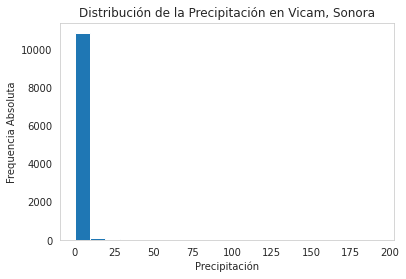

In [ ]:
plt.hist(df_dist['Precip'], bins=20)
plt.xlabel('Precipitación')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Precipitación en Vicam, Sonora')
plt.grid()
plt.show()

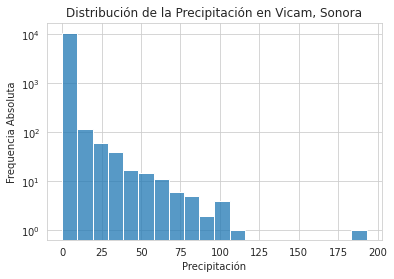

In [ ]:
sns.set_style("whitegrid")
plt.xlabel('Precipitación')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Precipitación en Vicam, Sonora')
sns.histplot(data=df_dist, x='Precip', bins=20, log_scale=(False,True))

Text(0.5, 1.0, 'Distribución de la Precipitación en Vicam, Sonora')

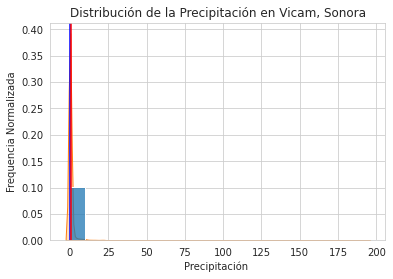

In [ ]:
sns.set_style("whitegrid")

Tmed = df_dist.Precip.median() 
Tprom = df_dist.Precip.mean()

sns.histplot(data=df_dist, x='Precip', bins=20, stat='density')
sns.kdeplot(df_dist.Precip, fill=True)

plt.axvline(Tmed, color = 'b') 
plt.axvline(Tprom, color = 'r')

plt.xlabel('Precipitación ')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Precipitación en Vicam, Sonora')

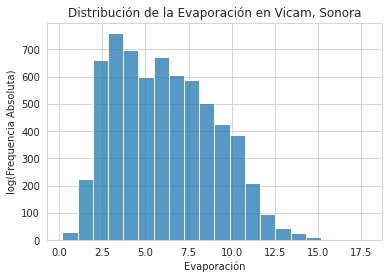

In [ ]:
sns.set_style("whitegrid")
plt.xlabel('Evaporación')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de la Evaporación en Vicam, Sonora')
sns.histplot(data=df_dist, x='Evap', bins=20)

Text(0.5, 1.0, 'Distribución de la Evaporación Máxima en Puerto Libertad SON')

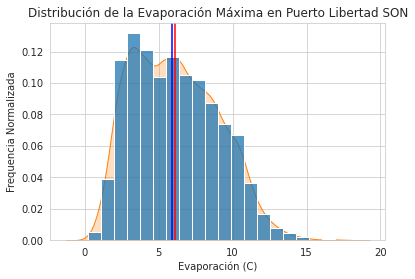

In [ ]:
sns.set_style("whitegrid")
Tmed = df_dist.Evap.median() 
Tprom = df_dist.Evap.mean()
sns.histplot(data=df_dist, x='Evap', bins=20, stat='density')
sns.kdeplot(df_dist.Evap, fill=True)
plt.axvline(Tmed, color = 'b') 
plt.axvline(Tprom, color = 'r')
plt.xlabel('Evaporación (C)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Evaporación Máxima en Vicam, Sonora')

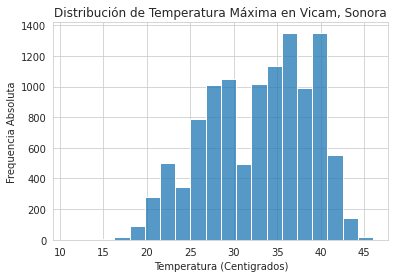

In [ ]:
sns.set_style("whitegrid")
plt.xlabel('Temperatura (Centigrados)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de Temperatura Máxima en Vicam, Sonora')
sns.histplot(data=df_dist, x='Tmax', bins=20)

Text(0.5, 1.0, 'Distribución de la Temperatura Máxima en Vicam, Sonora')

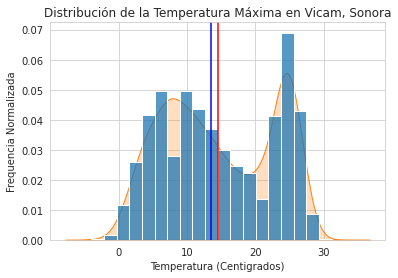

In [ ]:
#Volvemos a definir
sns.set_style("whitegrid")
Tmed = df_dist.Tmin.median() 
Tprom = df_dist.Tmin.mean()
sns.histplot(data=df_dist, x='Tmin', bins=20, stat='density')
sns.kdeplot(df_dist.Tmin, fill=True)
plt.axvline(Tmed, color = 'b') 
plt.axvline(Tprom, color = 'r')
plt.xlabel('Temperatura (Centigrados)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Vicam, Sonora')

Text(0.5, 1.0, 'Evaporación en Vicam, Sonora')

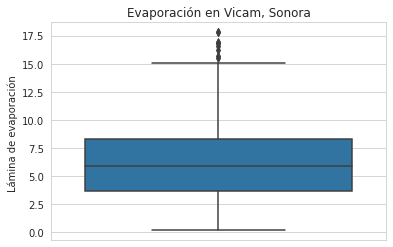

In [ ]:
#Graficas en caja
sns.set_style('whitegrid')

sns.boxplot(y=df_dist.Evap, data=df_dist, orient='Vertical').set(ylabel='Lámina de evaporación ')
plt.title('Evaporación en Vicam, Sonora')

Text(0.5, 1.0, 'Temperatura Máxima en Vicam, Sonora')

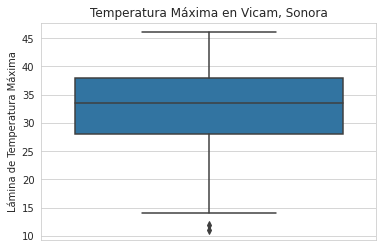

In [ ]:
sns.set_style('whitegrid')

sns.boxplot(y=df_dist.Tmax, data=df_dist, orient='Vertical').set(ylabel='Lámina de Temperatura Máxima')
plt.title('Temperatura Máxima en Vicam, Sonora')

Text(0.5, 1.0, 'Temperatura Minima en Vicam, Sonora')

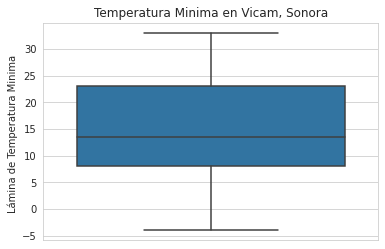

In [ ]:
sns.set_style('whitegrid')

sns.boxplot(y=df_dist.Tmin, data=df_dist, orient='Vertical').set(ylabel='Lámina de Temperatura Minima ')
plt.title('Temperatura Minima en Vicam, Sonora')

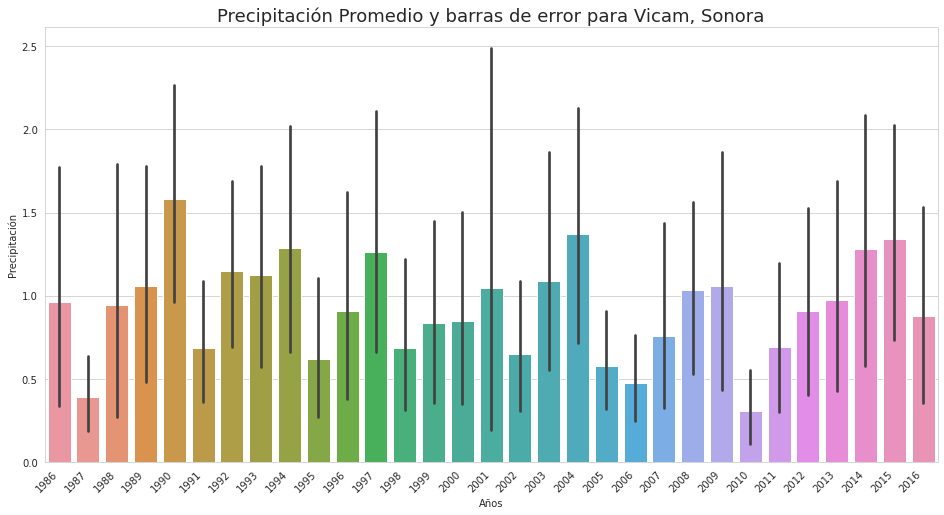

In [ ]:
# Conjunto de 30 años  
df_30 = df_dist[(df_dist['Año'] >= 1986) & (df_dist['Año'] <= 2016)]
# Gráfica de Precipitación últimos 30 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
g=sns.barplot(x='Año', y='Precip', data=df_30)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Años')
plt.ylabel('Precipitación')
plt.title('Precipitación Promedio y barras de error para Vicam, Sonora', fontsize=18)
plt.show()

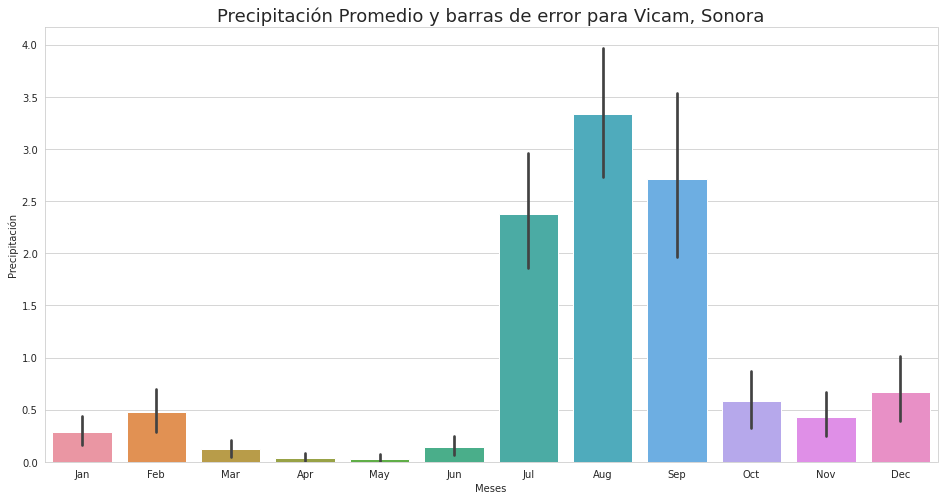

In [ ]:
# Gráfica de Precipitación 
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
g=sns.barplot(x='Mes', y='Precip', data=df_30)
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Meses')
plt.ylabel('Precipitación')
plt.title('Precipitación Promedio y barras de error para Vicam, Sonora', fontsize=18)
plt.show()

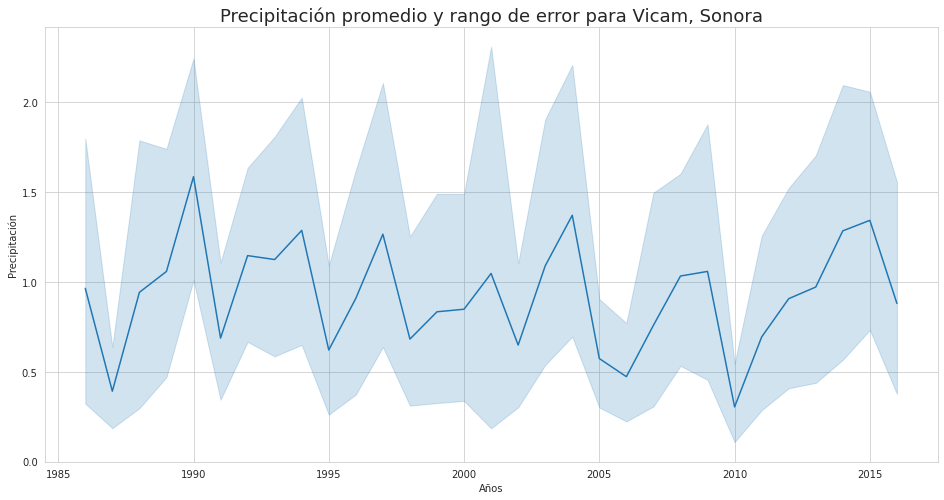

In [ ]:
# Gráfica de Precipitación 
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
g=sns.lineplot(x='Año', y='Precip', data=df_30)
plt.xlabel('Años')
plt.ylabel('Precipitación')
plt.title('Precipitación promedio y rango de error para Vicam, Sonora', fontsize=18)
plt.show()

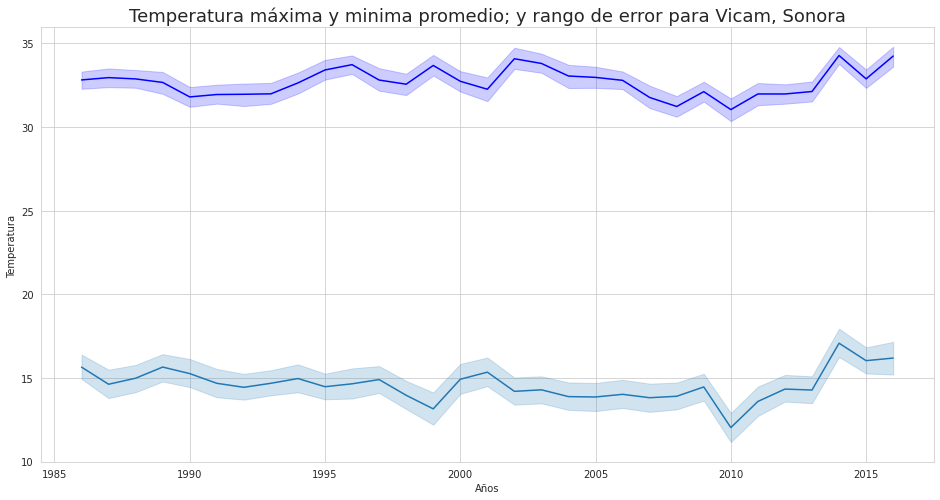

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.lineplot(x='Año', y='Tmax', data=df_30, color='b')
sns.lineplot(x='Año', y='Tmin', data=df_30)
plt.xlabel('Años')
plt.ylabel('Temperatura ')
plt.title('Temperatura máxima y minima promedio; y rango de error para Vicam, Sonora', fontsize=18)
plt.show()

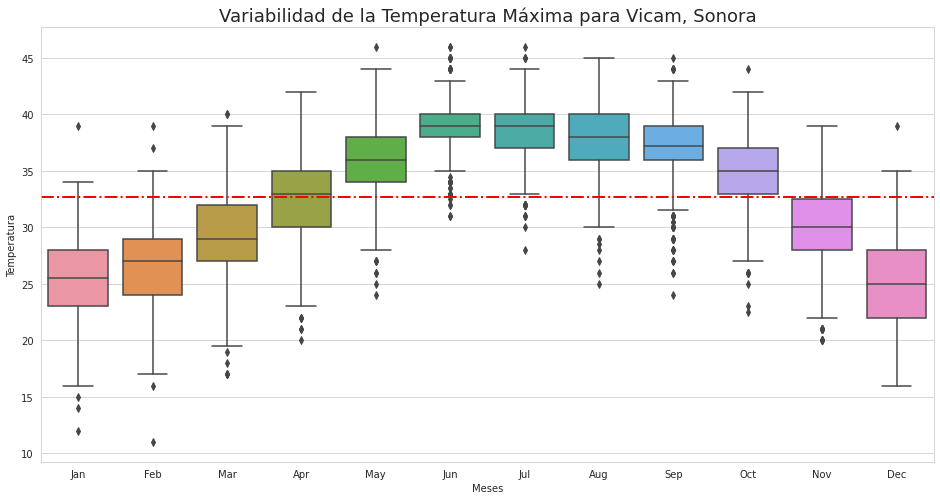

In [ ]:
# Gráfica de Temepraturas Máximas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
# Promedio de Tmax y Tmin
Tmax_ave = df_dist.Tmax.mean()
Tmin_ave = df_dist.Tmin.mean()
# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmax', data=df_30)
# Linea de Tmax promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='dashdot', linewidth=2)
plt.xlabel('Meses')
plt.ylabel('Temperatura')
plt.title('Variabilidad de la Temperatura Máxima para Vicam, Sonora', fontsize=18)
plt.show()

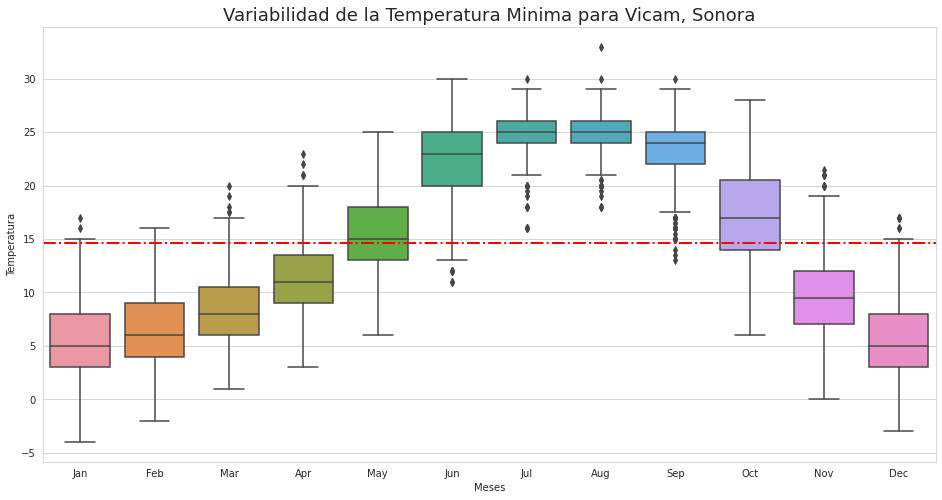

In [ ]:
# Gráfica de Temepraturas Máximas 
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
Tmin_ave = df_dist.Tmin.mean()
g=sns.boxplot(x='Mes', y='Tmin', data=df_30)
plt.axhline(Tmin_ave, color = 'r', linestyle='dashdot', linewidth=2)
plt.xlabel('Meses')
plt.ylabel('Temperatura')
plt.title('Variabilidad de la Temperatura Minima para Vicam, Sonora', fontsize=18)
plt.show()